In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class LinearRegression:
    def __init__(self):
        self.coefs = None
        self.epochs_cost = []
    
    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([X, ones], axis=1)
        
        try:
            y_pred=X@self.coefs
            
            return y_pred
        
        except:
            print('First fit your data and then predict the values')
            
    def cost(self, Yhat, Y):
        return ((Y - Yhat)**2).mean() / 2.0
    
    def fit(self, X, Y, learning_rate=0.01, max_epochs=100, tolerance=0.01):
            # concat ones
            ones = np.ones((X.shape[0], 1))
            X = np.concatenate([X, ones], axis=1)
        
            # input dimension
            lines, cols = X.shape
            
            # random weights
            W = np.random.rand(cols, 1)
            
            epoch = 0
            cost = tolerance + 1
            while (epoch < max_epochs and cost > tolerance):               
                # predict
                Yhat = X @ W
                
                # save cost
                self.epochs_cost.append(self.cost(Yhat, Y))
                
                #erro
                E = Y - Yhat
                
                # adjust
                Adj =(E * X).mean(axis=0).reshape(-1, 1)
                
                # adjust
                W = W + (learning_rate * Adj)
                
                epoch += 1
                cost = self.cost(Yhat, Y)
        
                if (epoch%50 == 0):
                    print(f"epoch: {epoch:3}  cost: {cost:10}")
            
            self.coefs = W
            
            return W
    
    def plot_cost(self):
        if len(self.epochs_cost) == 0:
            print('First fit your data and then predict the values')
            return
        
            
        plt.title('cost v/s iteration')
        plt.plot(self.epochs_cost)
        plt.xlabel('no. of iterations')
        plt.ylabel('cost')
        plt.show()


In [19]:
# random normal
np.random.seed(1)

x=np.random.randn(1000,1)  
w=np.random.randn()
b=np.random.randn()

y=x*w+b +(np.random.randn(1000,1)*0.09)  #this last term of np.random.randn() is to add noise in data

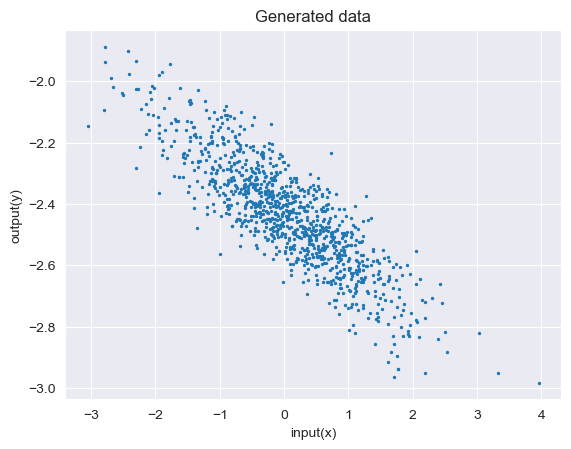

w: -0.15323616176709168
 b: -2.432508512647113


In [20]:
# plt.title('Generated data')
plt.title('Generated data')
plt.xlabel('input(x)')
plt.ylabel('output(y)')
plt.scatter(x=x[:,0],y=y[:,0], s=2)
plt.grid(True)
plt.show()
print(f"w: {w}\n b: {b}")

In [21]:
model = LinearRegression()
model.fit(x, y, 0.1, 100)

array([[-0.15685912],
       [-2.33853635]])

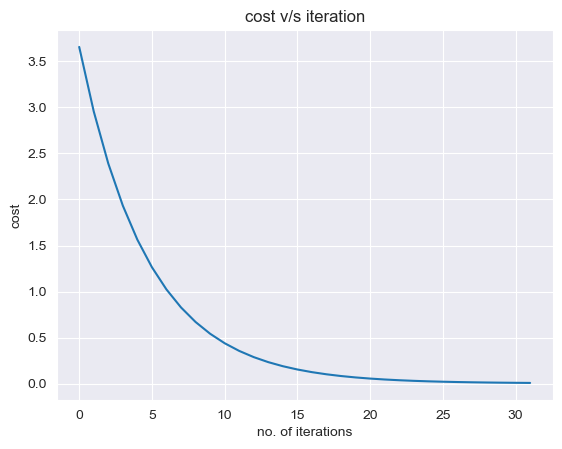

In [22]:
model.plot_cost()

In [23]:
# Predict
X = np.array([1]).reshape(1, 1)
model.predict(X)

array([[-2.49539547]])

## House Prices

In [24]:
import pandas as pd

In [25]:
data = pd.read_csv("./house_prices.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
pool = data.loc[:, ['LotArea', 'LotFrontage', 'SalePrice']].dropna()

In [27]:
pool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      1201 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 37.5 KB


In [28]:
pool

,LotArea,LotFrontage,SalePrice
0,8450,65.0,208500
1,9600,80.0,181500
2,11250,68.0,223500
3,9550,60.0,140000
4,14260,84.0,250000
...,...,...,...
1455,7917,62.0,175000
1456,13175,85.0,210000
1457,9042,66.0,266500
1458,9717,68.0,142125


In [29]:
def z_normalize(df):
    for col in df.columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()

In [30]:
X = pool.loc[:, ['LotArea', 'LotFrontage']]
Y = pool.loc[:, "SalePrice"]

In [31]:
z_normalize(X)

In [32]:
X = X.to_numpy()
Y = pool['SalePrice'].to_numpy().reshape(-1, 1)
z_normalize(Y)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [33]:
X.shape

(1201, 2)

In [34]:
Y.shape

(1201, 1)

In [35]:
model = LinearRegression()
model.fit(X, Y, max_epochs=100000, learning_rate=0.001, tolerance=0.01)

epoch:  50  cost: 18216731612.990437
epoch: 100  cost: 16744259899.684483
epoch: 150  cost: 15414301809.656763
epoch: 200  cost: 14212979458.304968
epoch: 250  cost: 13127777414.830547
epoch: 300  cost: 12147407512.262543
epoch: 350  cost: 11261687256.176542
epoch: 400  cost: 10461430440.712902
epoch: 450  cost: 9738348725.82039
epoch: 500  cost: 9084963059.430006
epoch: 550  cost: 8494523944.2054
epoch: 600  cost: 7960939652.135792
epoch: 650  cost: 7478711582.877589
epoch: 700  cost: 7042876044.606154
epoch: 750  cost: 6648951810.2683525
epoch: 800  cost: 6292892868.472735
epoch: 850  cost: 5971045847.653764
epoch: 900  cost: 5680111645.34548
epoch: 950  cost: 5417110842.06044
epoch: 1000  cost: 5179352521.982449
epoch: 1050  cost: 4964406160.971789
epoch: 1100  cost: 4770076276.717847
epoch: 1150  cost: 4594379566.673518
epoch: 1200  cost: 4435524287.041129
epoch: 1250  cost: 4291891650.8825493
epoch: 1300  cost: 4162019045.693343
epoch: 1350  cost: 4044584890.7767243
epoch: 1400  c

array([[ 16456.51917373],
       [ 22324.3169059 ],
       [180770.48043296]])

In [36]:
model.coefs

array([[ 16456.51917373],
       [ 22324.3169059 ],
       [180770.48043296]])

In [37]:
X[0, :].reshape(-1, 1)

array([[-0.18950423],
       [-0.2079477 ]])

In [38]:
ones = np.ones((X.shape[0], 1))
X = np.concatenate([X, ones], axis=1)

In [39]:
X[0, :].reshape(1, -1) @ model.coefs

array([[173009.61002819]])

In [40]:
Y[0]

array([208500])

In [41]:
X[5, :].reshape(1, -1) @ model.coefs

array([[203159.58525508]])

In [42]:
Y[5]

array([143000])